# TRABAJO FINAL DE FUNDAMENTOS DE MACHINE LEARNING
## Docente: Ruth Chirinos
## Fecha de Entrega: 23/Sept/2023 23:59:59
##******************************************************


---


## ENTREGAR EL NOTEBOOK EJECUTADO EN FORMATO ipynb y PDF. Trabajos sin ambos archivos ejecutados no tendran calificacion


---


##******************************************************

# Arboles de Decision en problemas de Clasificacion

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from sklearn.preprocessing import LabelEncoder #para la division de conjunto de datos de testeo y training
from sklearn.model_selection import train_test_split #para el objeto de decision tree
from sklearn.tree import DecisionTreeClassifier #para verificar los resultados de testeo
from sklearn.metrics import classification_report, confusion_matrix #para visualizar el arbol
from sklearn.tree import plot_tree

#Dataset
El conjunto de datos de la flor de Iris es un conjunto de datos multivariado introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 El uso de mediciones múltiples en problemas taxonómicos. A veces se le llama conjunto de datos de Iris de Anderson porque Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas. El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris Setosa, Iris virginica e Iris versicolor) dando un total de 150 registros. De cada muestra se midieron cuatro características: el largo y el ancho de los sépalos y pétalos, en centímetros.



In [23]:
# Entendiendo el largo y el ancho de los sépalos y pétalos
# ------------------------------------------------------------------------------
from IPython.display import Image
Image(url='https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg')

# Analisis y Prediccion

In [24]:
# Damos Lectura del Dataset
# ------------------------------------------------------------------------------
df = sns.load_dataset('iris')


In [25]:
# EJERCICIO 1
# Liste las primeras 5 filas del dataset
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Gracias a la libreria de 'seaborn' podras acceder al dataset de iris. Cuando observamos los datos que contiene el dataset podemos apreciar 4 columnas de caracteristicas: sepal_length, sepal_width, petal_length, and petal_width respectivamente con una columna 'target' (objetivo) llamada 'species'.
las primeras 4 caracteristicas nos permiten identificar la especie de cada flor.

In [26]:
# EJERCICIO 2
#Obtenemos la informacion del dataset
# ------------------------------------------------------------------------------
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [27]:
# EJERCICIO 3
# Obtenemos la cantidad de filas y columnas usando las funciones del dataframe
# ------------------------------------------------------------------------------
print(f"EL DATAFLOW CONTIENE UNA DIMENSION DE {df.shape} QUE CORRESPONDE A FILAS Y COLUMNAS DEL DATASET ")

EL DATAFLOW CONTIENE UNA DIMENSION DE (150, 5) QUE CORRESPONDE A FILAS Y COLUMNAS DEL DATASET 


## Analisis EDA

Ahora realizamos algunos EDA (Exploratory Data Analysis/Analisis Exploratorio de Datos) básicos en este conjunto de datos. Comprobemos la correlación de todas las características entre sí.

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


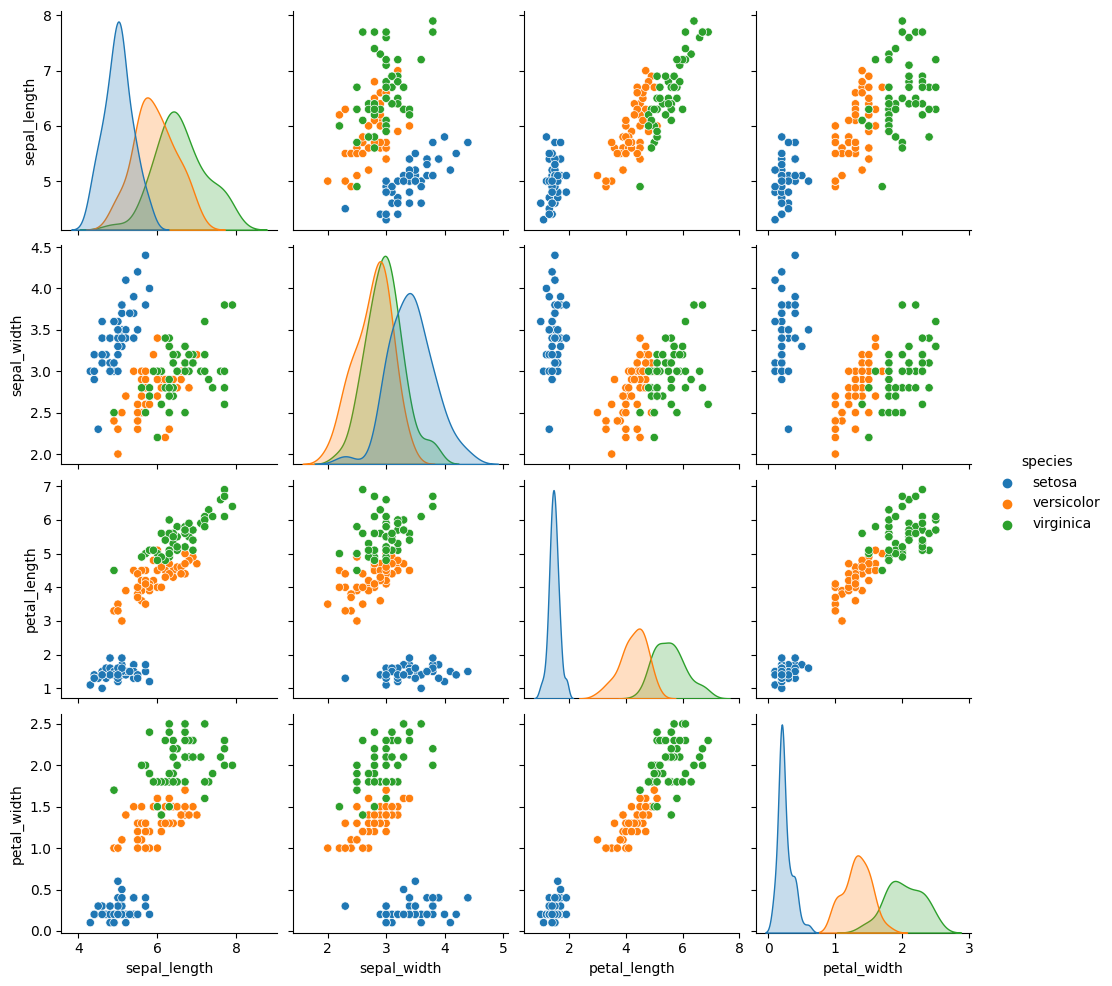

In [28]:
# Vamos a analizar las caracteristicas del dataset revisando su distribucion
# ------------------------------------------------------------------------------
sns.pairplot(data=df, hue = 'species')
# Donde:
# - hue = Variable en datos para asignar aspectos de la trama a diferentes colores.

En la grafica confirmamos la existencia de las 3 especies:
- setosa
- versicolor
- virginica


C:\Users\nicol\AppData\Local\Temp\ipykernel_13408\3801408206.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


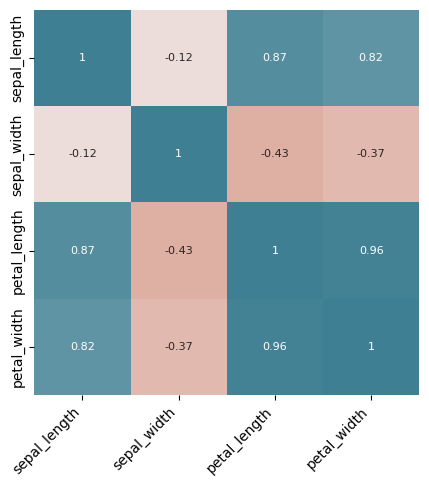

In [29]:
# Vamos a apoyarnos usando la Matriz de Correlacion para continuar el analisis
# ------------------------------------------------------------------------------
'''
Una matriz de correlación es una herramienta estadística que muestra la intensidad
y la dirección de la relación entre dos o más variables. Se utiliza mucho en campos
como las finanzas, la economía, la psicología y la biología, porque ayuda a entender
cómo se relacionan entre sí distintas cosas.
'''
matriz_correlacion = df.corr()

# Dibujamos el resultado de la matriz de correlacion
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    matriz_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

La matriz de correlación muestra los valores de correlación, que miden el grado de relación lineal entre cada par de variables. Los valores de correlación se pueden ubicar entre -1 y +1. Si las dos variables tienden a aumentar o disminuir al mismo tiempo, el valor de correlación es positivo.<p>
Por ejemplo: <p>
1. (Eje X) sepal_length vs (Eje Y) petal_width = 0.82, esto significa que ambas variables tienden a aumentar o disminuir al mismo tiempo.



**EJERCICIO 4**<p>
En base a las dos graficas anteriores que observa de acuerdo a la distribucion de los datos y a la matriz de correlacion? (De 5 observaciones principales de los datos justificando cada una de ellas con la importancia de porque las eligio)<p>
**Respuesta:**<p>

OBSERVACIONES: 


1. Las especies de versicolor y virginica tienen comportamientos de distribucion entre los features de manera muy similar a diferencia de setosa la cual se comporta de una manera diferente. Esto es visiblemente evidente viendo los cuadros en el grafico 1. 

* Considero que esta observacion es muy importante porque nos evita generalizar conclusiones que apliquen indiferente de las especies cuando vemos que la especie de setosa no se comporta de la misma manera que las otras. 

2.  Es interesante ver como el largo del petalo influye positivamente en el largo del sepalo de la especie para versicolor y virginica mas no para setosa donde el tamaño de su sepalo puede variar pero no parece influir en el tamaño del petalo que es muy consistente. 

* Identificar cómo el largo del pétalo influye en el largo del sépalo de manera diferente en setosa en comparación con versicolor y virginica es relevante para comprender las relaciones entre las características y cómo varían según la especie.

3. Segun el grafico 1, podemos afirmar que cuando analizamos sepalos podemos encontrar una mayor varianza con respecto a la media para las 3 especies. Sin embargo, cuando se trata de petalos vemos que la especie de setosa tiene una distribucion con una varianza muy cercana a la media y esto nos da una idea de que el tamaño de petalos en setosa es comun que tengan un tamaño consistente.

* Observar la varianza en el tamaño de sépalos y pétalos entre las especies proporciona información sobre la consistencia en el tamaño de los pétalos en setosa, lo cual es valioso para entender las características únicas de esta especie.

4. Podemos afirmar que el largo del petalo es positivamente correlacionado con el ancho del petalo en las especies de versicolor y virginica, esto se puede evidenciar en el mosaico de graficos con los cuadros (3,4) y (4,3) donde se evidencia una pendiente positiva entre los puntos y tambien con el grafico dos que nos informa de una correlacion cercana al 1(0.96)

* Identificar la correlación positiva entre el largo y ancho del pétalo en versicolor y virginica proporciona una comprensión cuantitativa de la relación entre estas características, lo cual es útil para futuros análisis y aplicaciones.

5. Sin conocer a la planta setosa y basandonos el en cuadro (3,4) y (4,3) podemos imaginar que tiene petalos con forma cuadrangular donde el ancho y el largo son muy similares. 

* Aunque no se dispone de información directa sobre la forma de los pétalos de setosa, realizar inferencias basadas en los gráficos y la correlación de características proporciona una perspectiva interesante sobre la posible forma de los pétalos en esta especie.



## Modelado

In [30]:
# Separando variables para el training y para el testing
# ------------------------------------------------------------------------------
# Ahora, separaremos la variable de destino (y) y las características (X) de la siguiente manera
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)


Es una buena práctica no eliminar ni agregar una nueva columna al conjunto de datos original.
Haga una copia y luego modifíquela para que, en caso de que las cosas no salgan como esperábamos,
tengamos los datos originales para comenzar de nuevo con un enfoque diferente.
Solo por seguir la convención más utilizada, estamos almacenando df en X

In [37]:
# Definiendo los atributos
X = df1

In [32]:
# Revisamos los datos de X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
# Revisamos los datos de target
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

La columna 'target' tiene variables categoricas (setosa, virginica y versicolor), entonces lo codificaremos en valores numéricos para trabajar.

In [34]:
# Label encoding (Codificacion de etiquetas)
# ------------------------------------------------------------------------------
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Obtenemos su codificación como arriba, setosa:0, versicolor:1, virginica:2

Nuevamente, para seguir la convención de nomenclatura estándar, nombrar destino como 'y'

In [35]:
y = target

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba. seleccionar 20% de registros al azar para realizar pruebas

In [38]:
#EJERCICIO 5 - Splitting
# Complete el siguiente codigo para dividir los datos > 80 training :20 testing
# ------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training split input- ", X_train.shape)
print()
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)

Testing split input-  (30, 4)


**EJERCICIO 6**<p>
Después de dividir el conjunto de datos, cuantos registros (filas) para entrenamiento tenemos y cuantos registros para fines de prueba??
**Respuesta:**<p>
*--- Reemplace aqui su respuesta---*



In [39]:
# EJERCICIO 7
# Definimos el algoritmo de Decision Tree (Arbol de decision)
# ------------------------------------------------------------------------------
#Definicion del decision tree
dtree = DecisionTreeClassifier(random_state=42)
#Entrenamiento
dtree.fit(X_train, y_train)

print('Decision Tree Classifier Created')

Decision Tree Classifier Created


En el código anterior, creamos un objeto de la clase DecisionTreeClassifier, almacenamos su dirección en la variable dtree, para que podamos acceder al objeto usando dtree. Luego ajustamos este árbol con nuestro X_train y y_train.

Finalmente, imprimimos la declaración Clasificador de árbol de decisión creado después de construir el árbol de decisión.

In [40]:
# Prediciendo los valores de los datos de testeo
# ------------------------------------------------------------------------------
y_pred = dtree.predict(X_test)
print("Reporte de Clasificacion - \n", classification_report(y_test,y_pred))

Reporte de Clasificacion - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Obtuvimos una precisión del 100% en el conjunto de datos de prueba de 30 registros.

tracemos la matriz de confusión de la siguiente manera

Text(0.5, 1.0, 'Accuracy Score: 1.0')

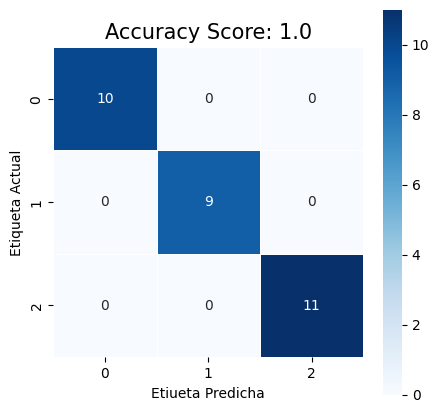

In [42]:
#EJERCICIO 8
# Obtenemos la matriz de confusion
# ------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm 

plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Etiqueta Actual')
plt.xlabel('Etiueta Predicha')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**EJERCICIO 9**<p>
Realice la interpretacion de TODOS los resultados de la matriz de confusion, se espera 9 interpretacion de resultados.<p>
**Respuesta:**<p>
* (1,1) El modelo predijo 10 especies con la etiqueta de Setosa y la etiqueta actual era Setosa
* (1,2) El modelo predijo 0 especies con la etiqueta de Setosa y la etiqueta actual era Versicolor
* (1,3) El modelo predijo 0 especies con la etiqueta de Setosa y la etiqueta actual era Virginica
_____________________________________________________________________________________________________
* (2,1) El modelo predijo 0 especies con la etiqueta de Versicolor y la etiqueta actual era Setosa
* (2,2) El modelo predijo 9 especies con la etiqueta de Versicolor y la etiqueta actual era Versicolor
* (2,3) El modelo predijo 0 especies con la etiqueta de Versicolor y la etiqueta actual era Virginica
_____________________________________________________________________________________________________
* (3,1) El modelo predijo 0 especies con la etiqueta de Virginica y la etiqueta actual era Setosa
* (3,2) El modelo predijo 0 especies con la etiqueta de Virginica y la etiqueta actual era Versicolor
* (3,3) El modelo predijo 11 especies con la etiqueta de Virginica y la etiqueta actual era Virginica

## Visualizamos el Decision Tree (Arbol de Decision)
Podemos trazar directamente el árbol que construimos usando los siguientes comandos

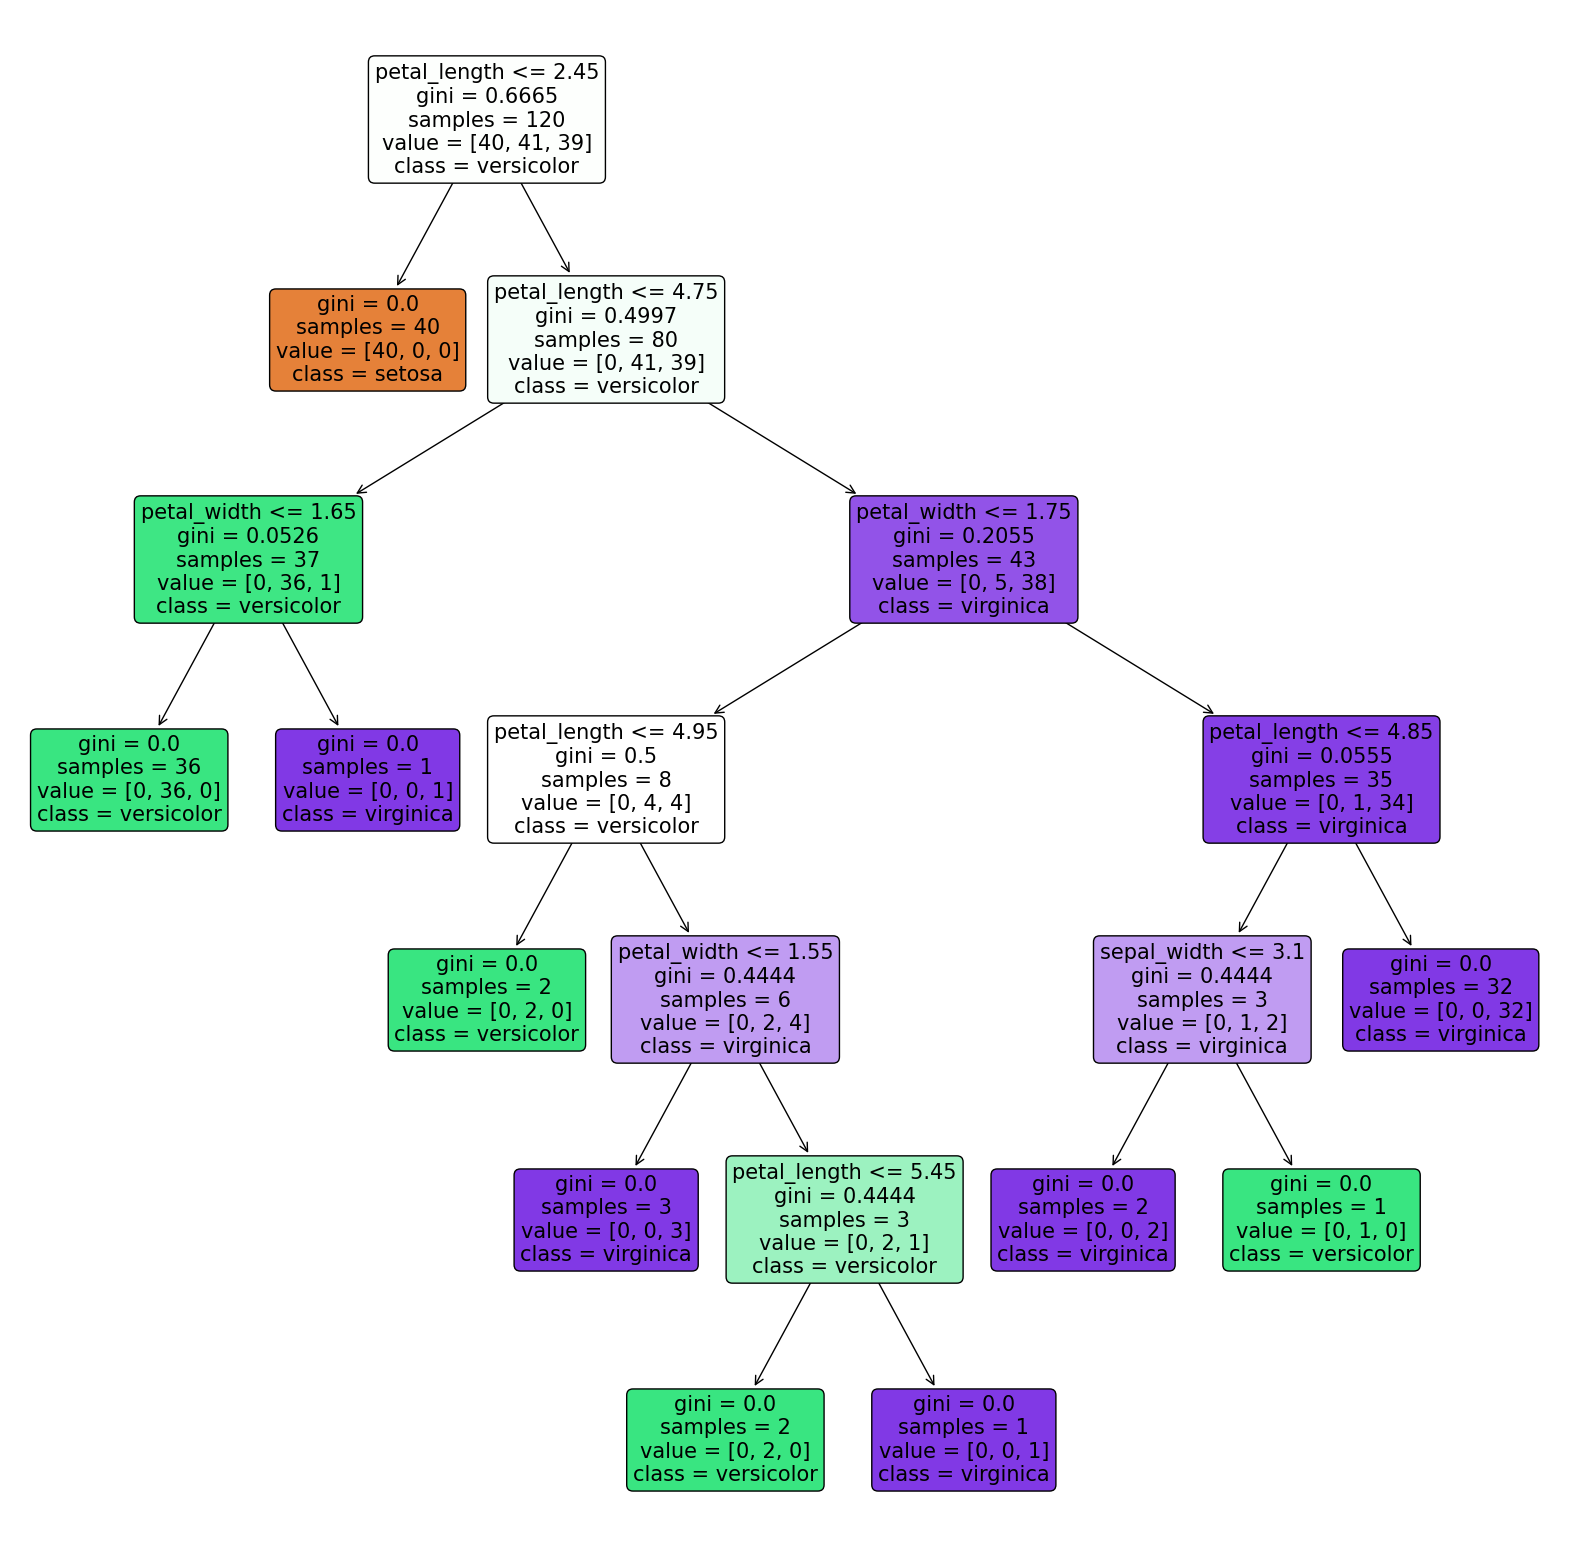

In [55]:
plt.figure(figsize = (20,20))
feature_names = df1.columns.tolist()
cn = ['setosa', 'versicolor', 'virginica']

dec_tree = plot_tree(
    decision_tree=dtree,
    feature_names = feature_names,
    class_names = cn,
    filled = True ,
    precision = 4,
    rounded = True,
    fontsize = 15)

Podemos ver cómo se divide el árbol, cuáles son los gini de los nodos, los registros en esos nodos y sus etiquetas.<P><p>

**EJERCICIO 10**<p>
Elija 3 caminos del arbol de decision y explique la evaluacio que el arbol ha realizado.<p>

**Respuesta:**<p>

1. Si el largo del petalo es <= 2.45
* False: es Setosa
* True: Especie Versicolor o Virginica
- ++++++++++++++++++++++++++++++++++++++++
2. Si el ancho del petalo es <= 1.65
* False: es Versicolor
* True: Virginica
- ++++++++++++++++++++++++++++++++++++++++
3. Si el largo del petalo es <= 5.45
* True: Es Versicolor
* False: Es Virginica